# Individual glacier analysis 1

This notebook will walk you through steps to read in and organize velocity data in a raster format using xarray and rioxarray tools

First, lets install the python libraries that were listed on the [Software](software.ipynb) page:

In [1]:
import geopandas as gpd
import os
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from geocube.api.core import make_geocube

### ALT cell: (for cloud data access, this is the preferable option but not currently working)
- try to open itslive xr object from s3 link. explain how we got the link (API that returns urls (?))
- itslive data cube catalong file: https://its-live-data.s3.amazonaws.com/datacubes/catalog_v02.json
** prob need to add zarr to env file, or just re-write env file

#### Two ways to get its_live urls via api: 

https://nsidc.org/apps/itslive-search/docs#/default/urls_velocities_urls__get

and via python api access below: 

In [ ]:
#getting itslive urls from api in python: 

import requests

base_api = 'https://nsidc.org/apps/itslive-search/velocities/urls'

params = {
    'bbox':'84.899, 27.98, 85.95, 28.75',
    'start': '2013-01-01',
    'end': '2021-12-31',
    'percent_valid_pixels':20,
    'min_interval': 7,
    'max_interval':100
}

velocity_pairs = requests.get(base_api, params=params)

In [ ]:
type(velocity_pairs)
#velocity_pairs
velocity_pairs_ls = velocity_pairs.json()
velocity_pairs_ls[0]['url']
#ds1 = xr.open_dataset(velocity_pairs_ls[0]['url'])

In [ ]:
#image_pair1 = xr.open_dataset(velocity_pairs_ls[0]['url'],
#                            engine = 'h5netcdf')

In [ ]:
#zarr_32645_x350000_y3050000 = 's3://its-live-data/datacubes/v02/N20E080/ITS_LIVE_vel_EPSG32645_G0120_X350000_Y3050000.zarr'

#ds_32645_x350000_y3050000 = xr.open_dataset(zarr_32645_x350000_y3050000, engine = 'zarr',
#                            storage_options= {'anon':True})

In [ ]:
zarr_32645_x350000_y4650000 = "s3://its-live-data/datacubes/v02/N40E080/ITS_LIVE_vel_EPSG32645_G0120_X350000_Y4650000.zarr"

ds_32645_x350000_y4650000 = xr.open_dataset(zarr_32645_x350000_y4650000, engine = 'zarr',
                            storage_options={'anon':True})

In [ ]:
ds_catalog.isel(mid_date=1).v.plot()

In [ ]:
ds_catalog.coords['x'].data.min()

In [ ]:
ds_catalog

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

def get_bbox(input_xr):

    xmin = input_xr.coords['x'].data.min()
    xmax = input_xr.coords['x'].data.max()

    ymin = input_xr.coords['y'].data.min()
    ymax = input_xr.coords['y'].data.max()

    pts_ls = [(xmin, ymin), (xmax, ymin),(xmax, ymax), (xmin, ymax), (xmin, ymin)]

    crs = {'init':f'epsg:{input_xr.mapping.spatial_epsg}'}
    polygon_geom = Polygon(pts_ls)
    polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])  

    polygon.plot(facecolor='none', edgecolor='red')     


    

In [ ]:
get_bbox(ds_catalog)

In [ ]:
zarr_url = 's3://its-live-data/datacubes/v02/N20E080/ITS_LIVE_vel_EPSG32645_G0120_X250000_Y3250000.zarr'


itslive_zarr = xr.open_dataset(zarr_url,
                              engine = 'zarr',  
                              storage_options = {'anon':True}
                              )

## Workflow with local data, not sure why s3 isn't working

In [2]:
gen_path = '/Users/emarshall/Desktop/siparcs/xr_book1/'

## ITS_LIVE raster data

This section contains a workflow for reading in and organizing ITS_LIVE glacier velocity data that is accessed in netcdf format from the NSIDC DAAC. Whereas before, we needed to build a the magnitude of velocity variable from the velocity component variables (individual geotiff files), the netcdf file contains a variable for magnitude of velocity as well as many other variables representing land cover types, error estimates and metadata

In [22]:
%%time

itslive = rxr.open_rasterio(gen_path[:-9] + '/data/HMA_G0120_0000.nc',
                            chunks = 'auto').squeeze()

CPU times: user 167 ms, sys: 13.3 ms, total: 180 ms
Wall time: 181 ms


In [23]:
itslive

<xarray.Dataset>
Dimensions:         (y: 15904, x: 23440)
Coordinates:
  * y               (y) float64 1.643e+06 1.643e+06 ... -2.648e+05 -2.649e+05
  * x               (x) float64 -2.16e+06 -2.16e+06 ... 6.526e+05 6.527e+05
    band            int64 1
    UTM_Projection  int64 0
Data variables: (12/13)
    vx              (y, x) float32 dask.array<chunksize=(5760, 5760), meta=np.ndarray>
    chip_size_max   (y, x) uint16 dask.array<chunksize=(8192, 8192), meta=np.ndarray>
    ocean           (y, x) uint8 dask.array<chunksize=(11584, 11584), meta=np.ndarray>
    rock            (y, x) uint8 dask.array<chunksize=(11584, 11584), meta=np.ndarray>
    ice             (y, x) uint8 dask.array<chunksize=(11584, 11584), meta=np.ndarray>
    vy              (y, x) float32 dask.array<chunksize=(5760, 5760), meta=np.ndarray>
    ...              ...
    vx_err          (y, x) float32 dask.array<chunksize=(5760, 5760), meta=np.ndarray>
    vy_err          (y, x) float32 dask.array<chunksize=(5760, 5760), meta=np.ndarray>
    v_err           (y, x) float32 dask.array<chunksize=(5760, 5760), meta=np.ndarray>
    date            (y, x) float32 dask.array<chunksize=(5760, 5760), meta=np.ndarray>
    dt              (y, x) uint16 dask.array<chunksize=(8192, 8192), meta=np.ndarray>
    count           (y, x) uint16 dask.array<chunksize=(8192, 8192), meta=np.ndarray>
Attributes:
    author:                   Alex S. Gardner, JPL/NASA
    date_created:             08-May-2019 13:31:28
    GDAL_AREA_OR_POINT:       Area
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    motion_coordinates:       map
    motion_detection_method:  feature
    scene_pair_type:          optical
    title:                    autoRIFT surface velocities

What is the CRS of this object?

There are two ways we can check that. First, by using the `rio.crs` accessor:

In [24]:
itslive.rio.crs

CRS.from_wkt('PROJCS["Asia_North_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["false_easting",0],PARAMETER["false_northing",0],PARAMETER["central_meridian",95],PARAMETER["standard_parallel_1",15],PARAMETER["standard_parallel_2",65],PARAMETER["latitude_of_origin",30],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","102027"]]')

The netcdf object is in a different CRS than the geotiff object. Because **Asia North Lambert Conformal Conic** covers a larger spatial extent than a single UTM zone (the projection of the geotiff object), we will use that projection.
*add link to good explainer page?*

In [25]:
itslive.dims

Frozen({'y': 15904, 'x': 23440})

In [26]:
itslive.coords

Coordinates:
  * y               (y) float64 1.643e+06 1.643e+06 ... -2.648e+05 -2.649e+05
  * x               (x) float64 -2.16e+06 -2.16e+06 ... 6.526e+05 6.527e+05
    band            int64 1
    UTM_Projection  int64 0

## Vector data 

In [27]:
#read in vector data 
se_asia = gpd.read_file(gen_path[:-9] + 'data/nsidc0770_15.rgi60.SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')

How many glaciers are in this dataframe?

In [28]:
len(se_asia['RGIId'])

13119

What coordinate reference system is this dataframe in? 

In [29]:
se_asia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The vector dataset is in WGS 84, meaning that its coordinates are in degrees latitude and longitude rather than meters N and E. We will project this dataset to match the projection of the netcdf dataset.

## Handling projections

Let's project this dataframe to match the CRS of the itslive dataset

In [30]:
#not sure why but this didn't work for me specifying epsg code, had to specify full description
se_asia_prj = se_asia.to_crs('+proj=lcc +lat_1=15 +lat_2=65 +lat_0=30 +lon_0=95 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs')
se_asia_prj.head(3)

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-15.00001,G102044E29941N,19990920,-9999999,102.044042,29.941000,15,3,0.438,4996,...,251,850,0,0,0,0,9,9,None,"POLYGON ((626747.322 19334.286, 626747.214 193..."
1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,0.644,4947,...,244,1021,0,0,0,0,9,9,None,"POLYGON ((626699.144 24673.098, 626701.110 246..."
2,RGI60-15.00003,G102041E29997N,19990920,-9999999,102.041130,29.997311,15,3,0.225,5019,...,274,812,0,0,0,0,9,9,None,"POLYGON ((626205.858 25396.784, 626210.489 254..."


## Let's start this analysis on a single glacier

We'll demonstrate analysis on a single glacier before scaling up to multiple glaciers. To start with, let's select the largest glacier in the dataframe.

In [31]:
se_asia_prj['Area'].idxmax()

11908

In [32]:
se_asia_prj.iloc[11908]

RGIId                                          RGI60-15.11909
GLIMSId                                        G096657E29334N
BgnDate                                              20050908
EndDate                                              -9999999
CenLon                                                 96.657
CenLat                                                 29.334
O1Region                                                   15
O2Region                                                    3
Area                                                  179.589
Zmin                                                     3980
Zmax                                                     6341
Zmed                                                     5207
Slope                                                    12.9
Aspect                                                     78
Lmax                                                    32403
Status                                                      0
Connect 

### So, our sample glacier is:

In [33]:
sample_glacier_prj = se_asia_prj.loc[se_asia_prj['RGIId'] == 'RGI60-15.11909']
sample_glacier_prj

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
11908,RGI60-15.11909,G096657E29334N,20050908,-9999999,96.657,29.334,15,3,179.589,3980,...,78,32403,0,0,1,0,1,9,Yagnung,"POLYGON ((141503.075 -60447.089, 141509.140 -6..."


#### Clip raster data to vector (sample glacier)

We'll be following [this example](https://corteva.github.io/rioxarray/stable/examples/clip_geom.html), go check it out for more info  

In [35]:
%%time

glacier_raster = itslive.rio.clip(sample_glacier_prj.geometry, sample_glacier_prj.crs)

CPU times: user 33.2 s, sys: 9.52 s, total: 42.8 s
Wall time: 44.1 s


In [36]:
glacier_raster

<xarray.Dataset>
Dimensions:         (y: 122, x: 226)
Coordinates:
  * y               (y) float64 -6.041e+04 -6.053e+04 ... -7.481e+04 -7.493e+04
  * x               (x) float64 1.357e+05 1.358e+05 ... 1.625e+05 1.627e+05
    band            int64 1
    spatial_ref     int64 0
    UTM_Projection  int64 0
Data variables: (12/13)
    vx              (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    chip_size_max   (y, x) uint16 dask.array<chunksize=(122, 226), meta=np.ndarray>
    ocean           (y, x) uint8 dask.array<chunksize=(122, 226), meta=np.ndarray>
    rock            (y, x) uint8 dask.array<chunksize=(122, 226), meta=np.ndarray>
    ice             (y, x) uint8 dask.array<chunksize=(122, 226), meta=np.ndarray>
    vy              (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    ...              ...
    vx_err          (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    vy_err          (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    v_err           (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    date            (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    dt              (y, x) uint16 dask.array<chunksize=(122, 226), meta=np.ndarray>
    count           (y, x) uint16 dask.array<chunksize=(122, 226), meta=np.ndarray>
Attributes:
    author:                   Alex S. Gardner, JPL/NASA
    date_created:             08-May-2019 13:31:28
    GDAL_AREA_OR_POINT:       Area
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    motion_coordinates:       map
    motion_detection_method:  feature
    scene_pair_type:          optical
    title:                    autoRIFT surface velocities

In [37]:
glacier_clipped = xr.where(glacier_raster.ice == 1., glacier_raster, np.NaN)

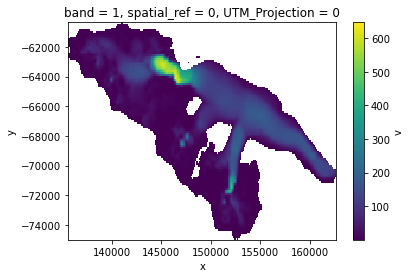

In [38]:
glacier_clipped.v.plot()

In [39]:
glacier_clipped

<xarray.Dataset>
Dimensions:         (y: 122, x: 226)
Coordinates:
  * y               (y) float64 -6.041e+04 -6.053e+04 ... -7.481e+04 -7.493e+04
  * x               (x) float64 1.357e+05 1.358e+05 ... 1.625e+05 1.627e+05
    band            int64 1
    spatial_ref     int64 0
    UTM_Projection  int64 0
Data variables: (12/13)
    vx              (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    chip_size_max   (y, x) float64 dask.array<chunksize=(122, 226), meta=np.ndarray>
    ocean           (y, x) float64 dask.array<chunksize=(122, 226), meta=np.ndarray>
    rock            (y, x) float64 dask.array<chunksize=(122, 226), meta=np.ndarray>
    ice             (y, x) float64 dask.array<chunksize=(122, 226), meta=np.ndarray>
    vy              (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    ...              ...
    vx_err          (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    vy_err          (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    v_err           (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    date            (y, x) float32 dask.array<chunksize=(122, 226), meta=np.ndarray>
    dt              (y, x) float64 dask.array<chunksize=(122, 226), meta=np.ndarray>
    count           (y, x) float64 dask.array<chunksize=(122, 226), meta=np.ndarray>

In [ ]:

#glacier_raster.ice.plot()

In [ ]:
#fig, ax = plt.subplots()

#sample_glacier.plot(ax=ax, facecolor='white', edgecolor='red')
#glacier_raster.v.plot(ax=ax, cmap=plt.cm.cividis)

In [ ]:
#glacier_raster.v.data.min()

### Handling missing data / selecting data (xr.where)
The above plot isn't that informative because you can see that the non-glaciated terrain surrounding the glacier is assigned negative values that skew the colorscale. Assigning missing or non-target datapoints a unique and distinctive numeric value can be useful in some cases, but for our purposes we don't want them showing up in our plots right now.

In [ ]:
#glacier_raster.ice.data.shape

#glacier_raster.v.data[51]

**fix this part**

In [ ]:
#anywhere glacier_raster.ice == 0, we want to turn to nan (I think?)
#glacier_raster_x = xr.where(glacier_raster.v != -32767., glacier_raster, np.nan)

In [ ]:
#glacier_raster_x.v.plot()